<a href="https://colab.research.google.com/github/amulyagupta1278/Coding-Projects/blob/Deep-Learning/Lab1%2B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Models and deployment

## Linear Models


### Linear Regression, 
### Linear Classifier

y = mx+c


y=m1.x1 + m2.x2 + ..... + c

Stock Market

I wish to predict the price a stock few years down the line

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d dgawlik/nyse

 72% 22.0M/30.7M [00:00<00:00, 103MB/s] 
100% 30.7M/30.7M [00:00<00:00, 116MB/s]


In [ ]:
!ls

gender_submission.csv  nyse.zip  test.csv  train.csv


In [ ]:
!unzip nyse.zip

Archive:  nyse.zip
  inflating: fundamentals.csv        
  inflating: prices-split-adjusted.csv  
  inflating: prices.csv              
  inflating: securities.csv          


In [ ]:
import pandas as pd
dataframe = pd.read_csv('prices-split-adjusted.csv',parse_dates=['date'])#date will be used as an object to another library
dataframe.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
google_df = dataframe[dataframe['symbol']=='GOOG'].set_index('date')
google_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0


In [ ]:
len(google_df)

1762

In [ ]:
google_df.loc['2010-01-04']

symbol         GOOG
open        312.305
close       312.205
low         310.955
high         313.58
volume    3.927e+06
Name: 2010-01-04 00:00:00, dtype: object

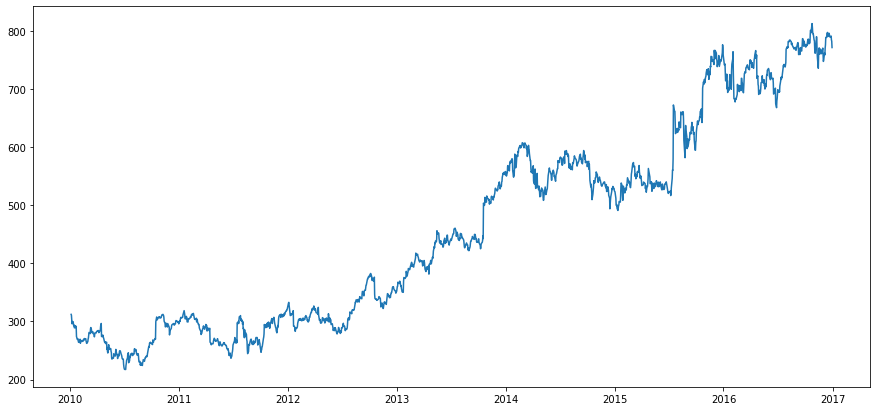

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(google_df.close)

I want to predict, approximately the price of this stock on some date, using whatever data I have. So, if I fit a straight line to this, and extrapolate to a few years down the line, i would get an answer that may be a prediction.

In [ ]:
first_day = google_df.index.min()
first_day

Timestamp('2010-01-04 00:00:00')

In [ ]:
def calculate_day_since(date, reference=first_day): return (date-reference).days

In [ ]:
from datetime import datetime
calculate_day_since(datetime(2022,1,22))


4401

In [ ]:
x=list(map(calculate_day_since,google_df.index))
x[:10]

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11]

In [ ]:
y=list(google_df.close)
y[:10]

[312.20530835799997,
 310.830458632,
 302.994812557,
 295.941242071,
 299.88646988799997,
 299.433161001,
 294.138016503,
 292.449323638,
 293.824173364,
 288.917548598]

In [ ]:
assert len(x)==len(y)

In [ ]:
len(x)

1762

Text(0.5, 0, 'Days since 4 Jan 2010')

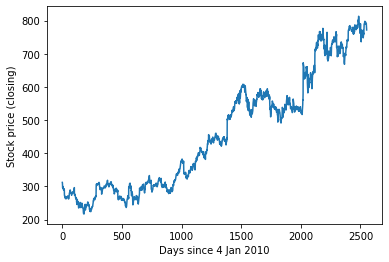

In [ ]:
plt.plot(x,y)
plt.ylabel('Stock price (closing)')
plt.xlabel('Days since 4 Jan 2010')

y=w.x + b

y=ground truth/label/output

w weight

x feature

b bias

In [ ]:
from sklearn.linear_model import LinearRegression
modified_x = [[i] for i in x]
modified_x[:10]

[[0], [1], [2], [3], [4], [7], [8], [9], [10], [11]]

In [ ]:
reg=LinearRegression().fit(modified_x,y)

In [ ]:
w,b = reg.coef_, reg.intercept_
w,b

(array([0.22513196]), 172.36461228620266)

In [ ]:
def lin_model(x): return x*w + b

Text(0.5, 0, 'Days since 4 Jan 2010')

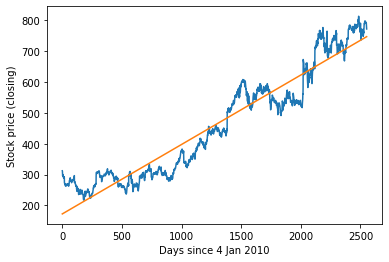

In [ ]:
plt.plot(x,y)
plt.plot(x,[lin_model(o) for o in x])
plt.ylabel('Stock price (closing)')
plt.xlabel('Days since 4 Jan 2010')

In [ ]:
day = datetime(2018,12,31)
days_elapsed = calculate_day_since(day)
days_elapsed

3283

In [ ]:
lin_model(days_elapsed)

array([911.47284609])

Gradient Descent

In [ ]:
z=[-5]
for i in range(1000): z= z+[z[-1]+0.01]
len(z)

1001

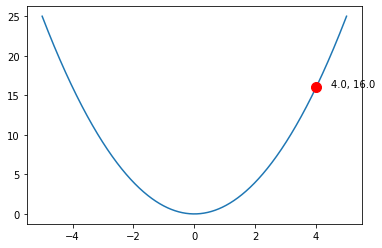

In [ ]:
def square(x): return x**2

fig,ax= plt.subplots()
ax.plot(z,[square(i) for i in z])


input = 4
point = ax.plot(input, square(input), color = 'red', marker='o', markersize=10)
text = ax.text(input+0.5, square(input), f'{input:.1f}, {square(input):.1f}')

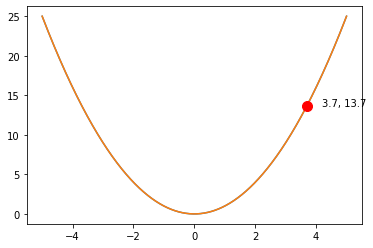

In [ ]:
def gradient_of_square(x): return 2*x

point[0].remove()
text.remove()

input=input-0.3 if gradient_of_square(input)>0 else input+0.3 #gradient descent equation

ax.plot(z,[square(i) for i in z])
point = ax.plot(input, square(input), color = 'red', marker='o', markersize=10)
text = ax.text(input+0.5, square(input), f'{input:.1f}, {square(input):.1f}')
fig

In [ ]:
input=4

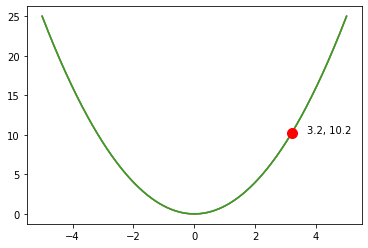

In [ ]:
def gradient_of_square(x): return 2*x

point[0].remove()
text.remove()

input=input-gradient_of_square(input)*0.1 # GRADIENT DESCENT EQUATION. lr (learning rate)

ax.plot(z,[square(i) for i in z])
point = ax.plot(input, square(input), color = 'red', marker='o', markersize=10)
text = ax.text(input+0.5, square(input), f'{input:.1f}, {square(input):.1f}')
fig

Mean Square Error Loss (MSE Loss)


$Minimize \frac{1}{n} \sum_1^n(pred - y)^2$


Step1: initialize w,b to some random values

Step2: for each iteration:

calculate

calculate the gradient. WE DONT CALCULATE GRADIENTS ANYMORE

go in the direction opposite to the gradient

In [ ]:
import torch 
params = torch.randn(2).requires_grad_()
w,b = params
w,b

(tensor(-0.8810, grad_fn=<UnbindBackward0>),
 tensor(0.2336, grad_fn=<UnbindBackward0>))

Text(0.5, 0, 'Days since 4 Jan 2010')

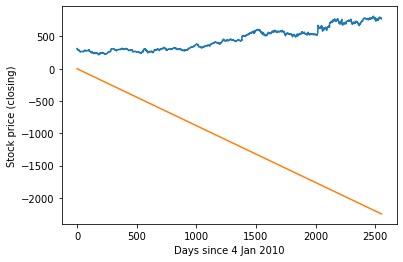

In [ ]:
plt.plot(x,y)
plt.plot(x,[lin_model(o) for o in x])
plt.ylabel('Stock price (closing)')
plt.xlabel('Days since 4 Jan 2010')

In [ ]:
x_tensor, y_tensor = torch.tensor(x).float(), torch.tensor(y).float()
x_tensor.divide_(1000)
# x_tensor = torch.nn.functional.normalize(x_tensor,dim=0)
# y_tensor = torch.nn.functional.normalize(y_tensor,dim=0)
x_tensor.shape, y_tensor.shape

(torch.Size([1762]), torch.Size([1762]))

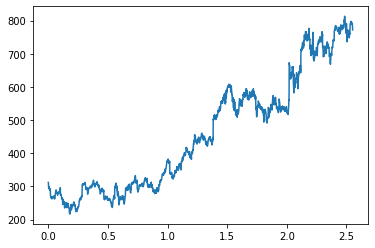

In [ ]:
plt.plot(x_tensor,y_tensor)

In [ ]:
def model(x,params=params):
    w,b = params
    return w*x + b

In [ ]:
preds = model(x_tensor)
preds.shape

torch.Size([1762])

In [ ]:
preds[0]

tensor(0.2336, grad_fn=<SelectBackward0>)

In [ ]:
loss_fn = torch.nn.MSELoss()

def loss_LinearRegression(pred,target):
    assert len(pred)==len(target)
    return loss_fn(pred,target)

Exercise 1: Implement MSELoss from scratch

In [ ]:
loss = loss_LinearRegression(preds,y_tensor)
loss

tensor(242524.3281, grad_fn=<MseLossBackward0>)

In [ ]:
loss.backward()

In [ ]:
lr=1e-4
params.data-=lr*params.grad
params

tensor([-0.7388,  0.3257], requires_grad=True)

one complete cycle

In [ ]:
params = torch.tensor([0.,0.]).requires_grad_()

def train_one_iteration(params,lr=1e-4):
    #step 1: calculate predictions
    preds = model(x_tensor,params)
    # calculate loss between preds and actual y's
    loss= loss_LinearRegression(preds,y_tensor)
    #calculate gradients
    loss.backward()
    #update variables through the gradient descent equation
    print(params.grad.data, params.data)
    params.data-=lr*params.grad.data
    params.grad=None

MSE Loss:  241488.25


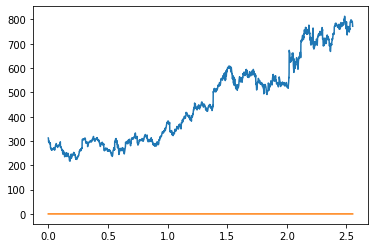

In [ ]:
def plot_linreg_model(params):
    plt.plot(x_tensor,y_tensor)
    pred=model(x_tensor,params).detach() # .detach is very important
    plt.plot(x_tensor,pred)
    print('MSE Loss: ', loss_LinearRegression(pred,y_tensor).item())

plot_linreg_model(params) 

tensor([-1418.3446,  -919.2349]) tensor([0., 0.])
tensor([-1401.3241,  -908.3191]) tensor([2.8367, 1.8385])
tensor([-1384.5070,  -897.5339]) tensor([5.6393, 3.6551])
tensor([-1367.8912,  -886.8776]) tensor([8.4084, 5.4502])
tensor([-1351.4742,  -876.3488]) tensor([11.1441,  7.2239])
tensor([-1335.2538,  -865.9458]) tensor([13.8471,  8.9766])
tensor([-1319.2274,  -855.6672]) tensor([16.5176, 10.7085])
tensor([-1303.3927,  -845.5115]) tensor([19.1560, 12.4199])
tensor([-1287.7476,  -835.4774]) tensor([21.7628, 14.1109])
tensor([-1272.2896,  -825.5632]) tensor([24.3383, 15.7818])
tensor([-1257.0166,  -815.7675]) tensor([26.8829, 17.4330])
tensor([-1241.9265,  -806.0890]) tensor([29.3969, 19.0645])
tensor([-1227.0167,  -796.5261]) tensor([31.8808, 20.6767])
tensor([-1212.2855,  -787.0778]) tensor([34.3348, 22.2697])
tensor([-1197.7305,  -777.7422]) tensor([36.7594, 23.8439])
tensor([-1183.3497,  -768.5183]) tensor([39.1549, 25.3994])
tensor([-1169.1410,  -759.4048]) tensor([41.5216, 26.936

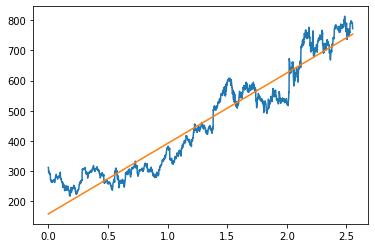

In [ ]:
params = torch.tensor([0.,0.]).requires_grad_()

for _ in range(500): train_one_iteration(params,lr=2e-3)
plot_linreg_model(params)

Deployment

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr


In [ ]:
def predict(days_elapsed):
    return model(days_elapsed).item()

iface = gr.Interface(fn=predict, inputs="number", outputs="number").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://46179.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


In [ ]:
model(4431)

tensor(-3273.4702, grad_fn=<AddBackward0>)

## Logistic Regression

Classification, not really regression

Titanic problem

https://www.kaggle.com/c/titanic


In [ ]:
# from google.colab import files
# uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/

In [ ]:
!mkdir titanic
%cd titanic
!kaggle competitions download -c titanic

/content/titanic/titanic/titanic
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 38.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 5.57MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 16.3MB/s]


In [ ]:
!ls

gender_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd
dataframe = pd.read_csv('train.csv')
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
length = len(dataframe)
train_df = dataframe.iloc[:int(length*0.8)]
test_df = dataframe.iloc[int(length*0.8):]

len(train_df), len(test_df)

(712, 179)

Preprocessing of data

In [ ]:
train_df['Sex'] = [1 if i is True else 0 for i in (train_df['Sex']=='male')]
test_df['Sex']  = [1 if i is True else 0 for i in (test_df['Sex']=='male')]

train_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

len(train_df), len(test_df)

(147, 36)

Feature Selection

In [ ]:
features = ['Sex','Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'
normalize_list = ['Age', 'Fare']

In [ ]:
import torch

In [ ]:
def normalize(x):
    x = torch.tensor(x)
    return (x-x.mean())/x.std()

def get_tensors_from_dataframe(df,features, target, normalize_list):
    x = []
    for feature in features:
        feature_values = list(df[feature])
        if feature in normalize_list: feature_values = normalize(feature_values)

        x.append(torch.tensor(feature_values))
    #x is now a list of all features (in tensor form)


    y = torch.tensor(df[target].values)
    return torch.stack(x).permute(1,0), y


x_train, y_train = get_tensors_from_dataframe(train_df,features, target, normalize_list)
x_test, y_test = get_tensors_from_dataframe(test_df,features, target, normalize_list)


x_train.shape, y_train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


(torch.Size([147, 5]), torch.Size([147]))

In [ ]:
train_dset = list(zip(x_train,y_train))
test_dset =  list(zip(x_test,y_test))

In [ ]:
train_dset

[(tensor([ 0.0000,  0.1370,  1.0000,  0.0000, -0.0933]), tensor(1)),
 (tensor([ 0.0000, -0.0509,  1.0000,  0.0000, -0.3520]), tensor(1)),
 (tensor([ 1.0000,  1.1389,  0.0000,  0.0000, -0.3696]), tensor(0)),
 (tensor([ 0.0000, -1.9921,  1.0000,  1.0000, -0.8697]), tensor(1)),
 (tensor([ 0.0000,  1.3894,  0.0000,  0.0000, -0.7296]), tensor(1)),
 (tensor([ 1.0000, -0.1135,  0.0000,  0.0000, -0.9224]), tensor(1)),
 (tensor([ 1.0000, -0.4892,  0.0000,  0.0000, -0.6023]), tensor(1)),
 (tensor([ 1.0000, -1.0528,  3.0000,  2.0000,  2.6338]), tensor(0)),
 (tensor([ 0.0000,  0.8258,  1.0000,  0.0000, -0.0158]), tensor(1)),
 (tensor([ 1.0000,  1.8278,  0.0000,  1.0000, -0.2257]), tensor(0)),
 (tensor([1.0000, 0.5753, 1.0000, 0.0000, 0.0801]), tensor(0)),
 (tensor([ 0.0000, -0.4266,  0.0000,  0.0000, -0.9579]), tensor(1)),
 (tensor([ 1.0000, -0.6771,  0.0000,  0.0000, -0.9985]), tensor(0)),
 (tensor([ 0.0000, -0.8023,  3.0000,  2.0000,  2.6338]), tensor(1)),
 (tensor([ 1.0000,  0.6380,  1.0000,  0

DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_dset, batch_size = 16)
test_dl = DataLoader(test_dset, batch_size = 16)

In [ ]:
for x,y in train_dl: print(x.shape,y.shape)

torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([16, 5]) torch.Size([16])
torch.Size([3, 5]) torch.Size([3])


In [ ]:
# ??DataLoader

In [ ]:
# def train_one_iteration(params,lr=1e-4):
#     #step 1: calculate predictions
#     preds = model(x_tensor,params)
#     # calculate loss between preds and actual y's
#     loss= loss_LinearRegression(preds,y_tensor)
#     #calculate gradients
#     loss.backward()
#     #update variables through the gradient descent equation
#     print(params.grad.data, params.data)
#     params.data-=lr*params.grad.data
#     params.grad=None
def logistic_regression_model(x):
    return torch.sigmoid(x@weights + bias) # f(x) = 1/(1+e^-x) 

def calc_grad(x,y,model):
    pred = model(x)
    loss = loss_fn(pred,y)
    loss.backward()

def train_epoch(model,lr,params):
    for x,y in train_dl:
        calc_grad(x,y,model)
        for p in params:
            p.data-=lr*p.grad
            p.grad.zero_()

def accuracy(pred,y): #metric
    return ((pred>0.5)==y).float().mean()

def validate_epoch(model):
    accuracy_ = [accuracy(model(x),y) for x,y in test_dl]
    return torch.stack(accuracy_).float().mean()


In [ ]:
# x = 1,5
# w = 1,5


# x.w = 1,5
# x.wT = 1,5 x 5,1 = 1,1
# x1w1 + x2w2 + x3

y = w1x1 + w2x2 + w3x3 + w4x4+ w5x5 + b

In [ ]:
def init_params(size): return torch.randn(size).requires_grad_()

weights = init_params(5)
bias = init_params(1)

params = (weights,bias)
params

(tensor([ 0.8598, -2.2614,  2.0812, -2.1377, -1.7168], requires_grad=True),
 tensor([-0.0191], requires_grad=True))

Loss Function

In [ ]:
def binary_classification_loss(y_pred,target):
    assert len(y_pred) == len(target)
    #whenever target = 1, loss = 1-y_pred, 
    #whenever target = 0, loss = y_pred
    return torch.where(target==1, 1-y_pred, y_pred).mean()



x,y = next(iter(train_dl))
pred= logistic_regression_model(x)
binary_classification_loss(pred,y)

tensor(0.4325, grad_fn=<MeanBackward0>)

In [ ]:
loss_fn = binary_classification_loss


#overshooting the minima
for _ in range(1000):
    train_epoch(logistic_regression_model, 1e-1, params)
    print('validation accuracy:', validate_epoch(logistic_regression_model))

validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validation loss: tensor(0.5833)
validati